In [1]:
# 导入数据预处理所需的库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 读取数据
data = pd.read_csv(r'D:\vscfiles\jpy\datasets\Titanic\train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# 把Sex列改为Gender，体现对不同性别身份的尊重和包容
data.rename(columns={'Sex': 'Gender'}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 预处理之前可视化分析一下数据

<Axes: xlabel='Pclass', ylabel='Survived'>

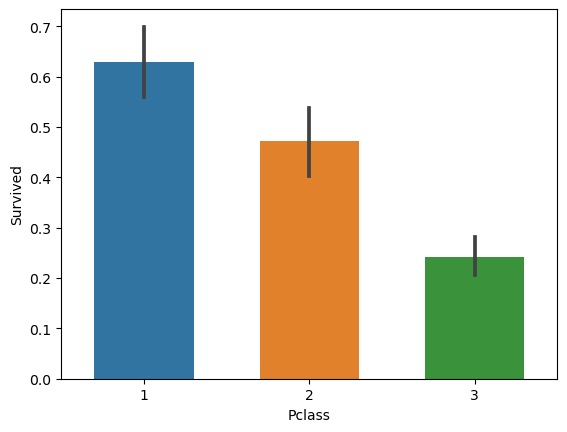

In [4]:
# 社会等级对存活的影响：社会等级越高，存活率越高
sns.barplot(x='Pclass', y='Survived', data=data, width=0.6)

<Axes: xlabel='Gender', ylabel='Survived'>

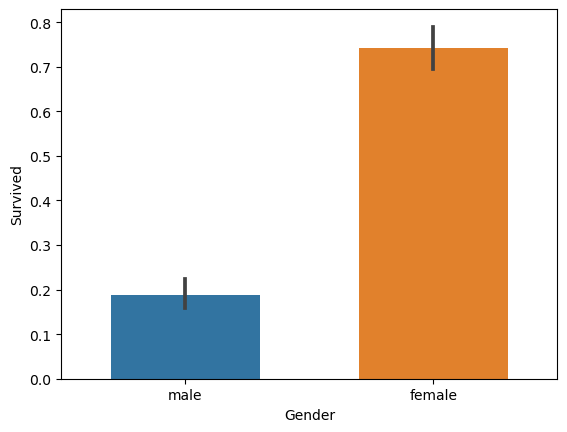

In [5]:
# 性别对存活的影响：女性的存活率远大于男性
sns.barplot(x="Gender", y="Survived", data=data, width=0.6)

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

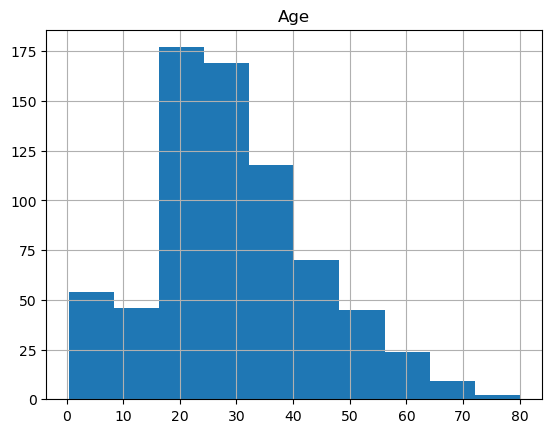

In [6]:
# 绘制年龄的直方图
data.hist('Age')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(39.113917181069965, 0.5, 'Survived')

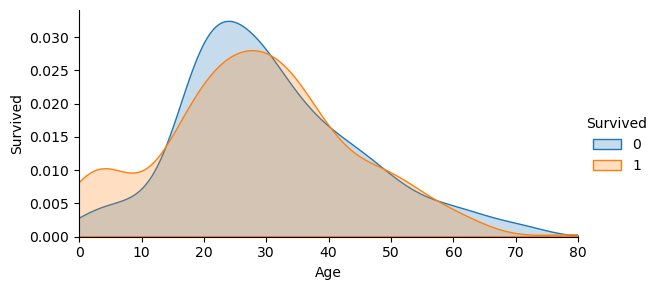

In [7]:
# 年龄对存活的影响：在0~35岁中的人群具有更高的生存概率，高于35岁的人群生存概率较低
facet = sns.FacetGrid(data, hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()
plt.xlabel('Age') 
plt.ylabel('Survived') 

In [8]:
# 筛选特征，删掉乘客ID，票号和船舱号等对于生存影响小的特征
data.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [9]:
# 数据描述
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# 将直系亲属和旁系亲属两个特征合并为家人
data['FamilySize']=data['SibSp']+data['Parch']+1
data = data.drop(['SibSp', 'Parch'], axis=1)

In [11]:
# 考虑性别因素，分别用男女乘客各自年龄的中位数来填补缺失的年龄数据
# 先为男性填补年龄
data.loc[data['Gender'] == 'male', 'Age'] = data.loc[data['Gender'] == 'male', 'Age'].fillna(data[data['Gender'] == 'male']['Age'].median())
# 再为女性填补年龄
data.loc[data['Gender'] == 'female', 'Age'] = data.loc[data['Gender'] == 'female', 'Age'].fillna(data[data['Gender'] == 'female']['Age'].median())
data.describe()

,Survived,Pclass,Age,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.441268,32.204208,1.904602
std,0.486592,0.836071,13.018747,49.693429,1.613459
min,0.000000,1.000000,0.420000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000
50%,0.000000,3.000000,29.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000


In [12]:
# 男女性别是二分类，可以使用布尔值进行转换，其中男性标记为1，女性标记为0
# data['Gender'] = (data['Gender'] == 'male').astype('int')
# 注意：我这里先不处理性别，因为有些模型不需要进行标签编码（比如决策树、随机森林），而基于参数或距离的模型是需要归一化并考虑编码的。
# 同理下面的Embarked一列 S C Q 三个值我也暂时没有处理

In [13]:
# 查看'Embarked'中不同值的数量
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [14]:
# 'Embarked'中为S的数据最多，直接把包含缺失值的两行数据填充为S
data['Embarked'].fillna('S', inplace=True)
data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [15]:
# 提取姓名中的有用信息
data['Title'] = data['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())
data['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'],'Officer', inplace=True)
data['Title'].replace(['Don', 'Dona', 'Sir', 'Lady', 'the Countess', 'Jonkheer', 'Master'],'Elite', inplace=True)
data['Title'].replace(['Mme', 'Ms', 'Mrs'],'Mrs', inplace=True)
data['Title'].replace(['Mlle', 'Miss'],'Miss', inplace=True)
data['Title'].replace(['Mr'], 'Mr', inplace=True)
data = data.drop('Name', axis=1)
data

,Survived,Pclass,Gender,Age,Fare,Embarked,FamilySize,Title
0,0,3,male,22.0,7.2500,S,2,Mr
1,1,1,female,38.0,71.2833,C,2,Mrs
2,1,3,female,26.0,7.9250,S,1,Miss
3,1,1,female,35.0,53.1000,S,2,Mrs
4,0,3,male,35.0,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,13.0000,S,1,Officer
887,1,1,female,19.0,30.0000,S,1,Miss
888,0,3,female,27.0,23.4500,S,4,Miss
889,1,1,male,26.0,30.0000,C,1,Mr


In [16]:
data['Title'].value_counts()

Title
Mr         517
Miss       184
Mrs        127
Elite       45
Officer     18
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

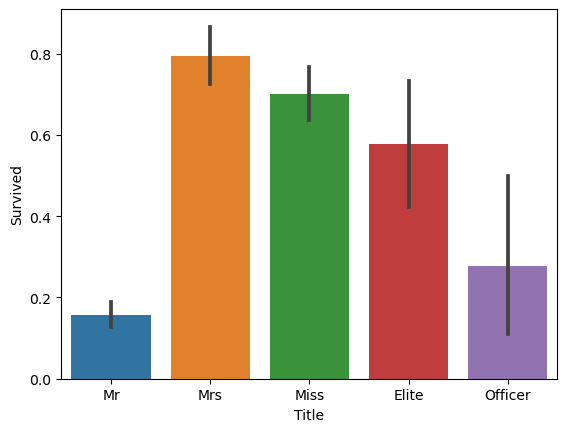

In [17]:
sns.barplot(x="Title", y="Survived", data=data)

In [18]:
# 导出data为CSV文件
data.to_csv(r'D:\vscfiles\jpy\datasets\Titanic\processed_train.csv', index=False)